# Comprehensive Data Cleaning Project Template




## **1. Initial Data Assessment**
### **1.1 Environment Setup**

In [10]:
# Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **1.2 Data Loading & First Look**

In [11]:
# Load datasets
# Note: Adjust the file paths as necessary for your environment
df1 = pd.read_csv("../../01_data/England 2 CSV.csv")
df2 = pd.read_csv("../../01_data/England CSV.csv")

In [12]:
# Combine datasets
df = pd.concat([df1, df2], ignore_index=True)

In [13]:
def check_dataframe(df, name):
    print(f"--- DataFrame: {name} ---")
    
    # Basic Information
    print("Shape:", df.shape)
    print("First few rows:\n", df.head())
    print("Last few rows:\n", df.tail())
    
    # Data Types and Memory Usage
    print("Data Types:\n", df.dtypes)
    print("Memory Usage:\n", df.info(memory_usage='deep'))
    
    # Summary Statistics
    print("Descriptive Statistics:\n", df.describe())
    
    # Missing Values
    print("Missing Values:\n", df.isnull().sum())
    
    # Unique Values (for the first few columns)
    for column in df.columns[:5]:  # Adjust as needed
        print(f"Unique values in '{column}':", df[column].unique())
    
    # Check for Duplicates
    print("Duplicate Rows:", df.duplicated().sum())
    
    print("\n")



In [15]:
# Check each DataFrame
check_dataframe(df1, "df1")

--- DataFrame: df1 ---
Shape: (11351, 25)
First few rows:
          Date   Season    HomeTeam    AwayTeam  FTH Goals  FTA Goals  \
0  15/01/2025  2024/25   Blackburn  Portsmouth          3          0   
1  14/01/2025  2024/25     Cardiff     Watford          1          1   
2  14/01/2025  2024/25    Plymouth      Oxford          1          1   
3   6/01/2025  2024/25         QPR       Luton          2          1   
4   5/01/2025  2024/25  Sunderland  Portsmouth          1          0   

  FT Result  HTH Goals  HTA Goals HT Result  ... H Fouls  A Fouls  H Corners  \
0         H        0.0        0.0         D  ...    15.0     19.0        5.0   
1         D        0.0        0.0         D  ...     8.0     14.0        7.0   
2         D        0.0        1.0         A  ...     8.0     10.0        6.0   
3         H        1.0        1.0         D  ...    10.0      9.0        3.0   
4         H        1.0        0.0         H  ...     9.0     10.0        7.0   

   A Corners  H Yellow  A Y

In [16]:
check_dataframe(df2, "df2")

--- DataFrame: df2 ---
Shape: (12153, 25)
First few rows:
          Date   Season      HomeTeam                AwayTeam  FTH Goals  \
0  16/01/2025  2024/25  Ipswich Town  Brighton & Hove Albion          0   
1  16/01/2025  2024/25    Man United             Southampton          3   
2  15/01/2025  2024/25       Everton             Aston Villa          0   
3  15/01/2025  2024/25     Leicester          Crystal Palace          0   
4  15/01/2025  2024/25     Newcastle                  Wolves          3   

   FTA Goals FT Result  HTH Goals  HTA Goals HT Result  ... H Fouls  A Fouls  \
0          2         A        0.0        1.0         A  ...    13.0     14.0   
1          1         H        0.0        1.0         A  ...     7.0     10.0   
2          1         A        0.0        0.0         D  ...    17.0     10.0   
3          2         A        0.0        0.0         D  ...     7.0      6.0   
4          0         H        1.0        0.0         H  ...    10.0     13.0   

   H Corn

In [17]:
check_dataframe(df, "Combined df")

--- DataFrame: Combined df ---
Shape: (23504, 25)
First few rows:
          Date   Season    HomeTeam    AwayTeam  FTH Goals  FTA Goals  \
0  15/01/2025  2024/25   Blackburn  Portsmouth          3          0   
1  14/01/2025  2024/25     Cardiff     Watford          1          1   
2  14/01/2025  2024/25    Plymouth      Oxford          1          1   
3   6/01/2025  2024/25         QPR       Luton          2          1   
4   5/01/2025  2024/25  Sunderland  Portsmouth          1          0   

  FT Result  HTH Goals  HTA Goals HT Result  ... H Fouls  A Fouls  H Corners  \
0         H        0.0        0.0         D  ...    15.0     19.0        5.0   
1         D        0.0        0.0         D  ...     8.0     14.0        7.0   
2         D        0.0        1.0         A  ...     8.0     10.0        6.0   
3         H        1.0        1.0         D  ...    10.0      9.0        3.0   
4         H        1.0        0.0         H  ...     9.0     10.0        7.0   

   A Corners  H Yel

In [20]:
# Set Pandas options to display all columns
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)         # Adjust width automatically



In [22]:
from IPython.display import display
display(df)

,Date,Season,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,A Shots,H SOT,A SOT,H Fouls,A Fouls,H Corners,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,F Hallam,13.0,11.0,6.0,2.0,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,O Langford,12.0,4.0,4.0,2.0,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second
2,14/01/2025,2024/25,Plymouth,Oxford,1,1,D,0.0,1.0,A,S Allison,11.0,8.0,2.0,3.0,8.0,10.0,6.0,3.0,1.0,1.0,0.0,0.0,20250114,English Second
3,6/01/2025,2024/25,QPR,Luton,2,1,H,1.0,1.0,D,A Davies,15.0,18.0,6.0,4.0,10.0,9.0,3.0,4.0,1.0,1.0,0.0,0.0,20250106,English Second
4,5/01/2025,2024/25,Sunderland,Portsmouth,1,0,H,1.0,0.0,H,T Bramall,24.0,6.0,8.0,1.0,9.0,10.0,7.0,3.0,1.0,2.0,0.0,1.0,20250105,English Second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23499,14/08/1993,1993/94,Southampton,Everton,0,2,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
23500,14/08/1993,1993/94,Sheffield United,Swindon,3,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
23501,14/08/1993,1993/94,Liverpool,Sheffield Weds,2,0,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League
23502,14/08/1993,1993/94,Aston Villa,QPR,4,1,H,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19930814,Premier League


### **1.3 Initial Quality Checks**
- **Visualizations**:

C:\Users\Morobang\AppData\Local\Temp\ipykernel_7220\1992979384.py:30: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


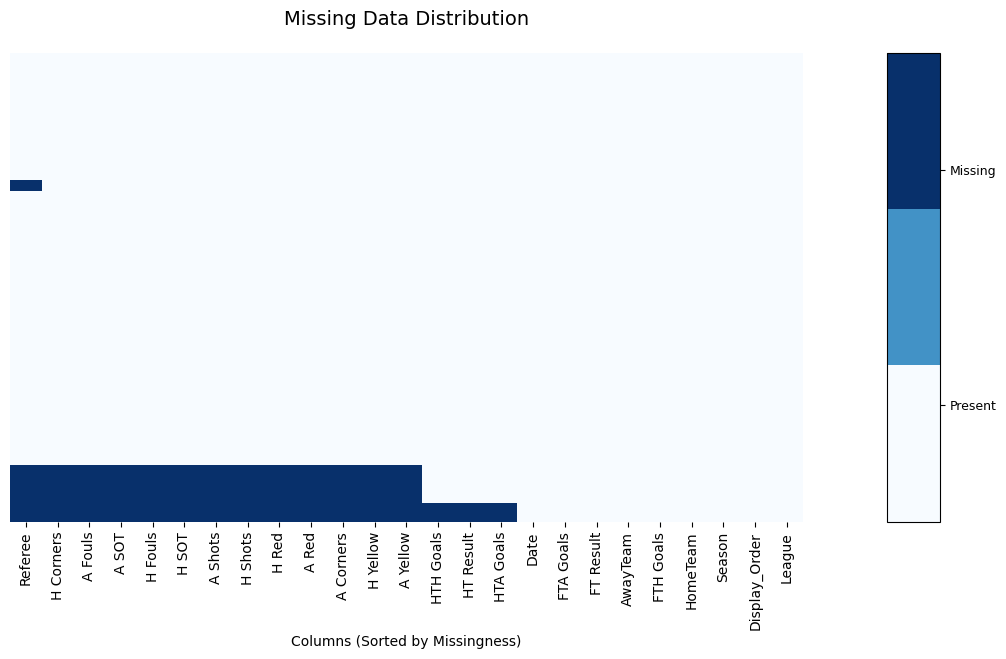


🔍 Missing Data Insights:
- Total missing cells: 40052
- Most missing column: 'Referee' (14.4% missing)
- Columns needing attention: ['Referee', 'H Corners', 'A Fouls', 'A SOT', 'H Fouls', 'H SOT', 'A Shots', 'H Shots', 'H Red', 'A Red', 'A Corners', 'H Yellow', 'A Yellow']


In [ ]:
# Enhanced Missing Data Visualization
plt.figure(figsize=(12, 8))

# Custom color palette
null_palette = sns.color_palette(["#f7fbff", "#4292c6", "#08306b"])

# Calculate missing percentages
missing_percent = df.isnull().mean().sort_values(ascending=False) * 100

# Create subplots grid
grid = plt.GridSpec(2, 2, width_ratios=[15,1], height_ratios=[1,4], hspace=0.1)

# Main heatmap
ax1 = plt.subplot(grid[1,0])
sns.heatmap(df.isnull()[missing_percent.index], 
            cbar=False, 
            cmap=null_palette,
            yticklabels=False,
            ax=ax1)
plt.title('Missing Data Distribution', pad=20, fontsize=14)
plt.xlabel('Columns (Sorted by Missingness)', fontsize=10)

# Colorbar legend
ax3 = plt.subplot(grid[1,1])
cbar = plt.colorbar(ax1.collections[0], cax=ax3)
cbar.set_ticks([0.25, 0.75])
cbar.set_ticklabels(['Present', 'Missing'])
cbar.ax.tick_params(labelsize=9)

plt.tight_layout()

# Annotate critical findings
if missing_percent.max() > 30:
    ax2.annotate(f'Critical: {missing_percent.idxmax()} ({missing_percent.max():.1f}% missing)',
                xy=(0, missing_percent.max()),
                xytext=(5, 25), 
                textcoords='offset points',
                arrowprops=dict(arrowstyle='->'),
                color='red')

plt.show()

# Print actionable summary
print("\n Missing Data Insights:")
print(f"- Total missing cells: {df.isnull().sum().sum()}")
print(f"- Most missing column: '{missing_percent.idxmax()}' ({missing_percent.max():.1f}% missing)")
print(f"- Columns needing attention: {list(missing_percent[missing_percent > 5].index)}")



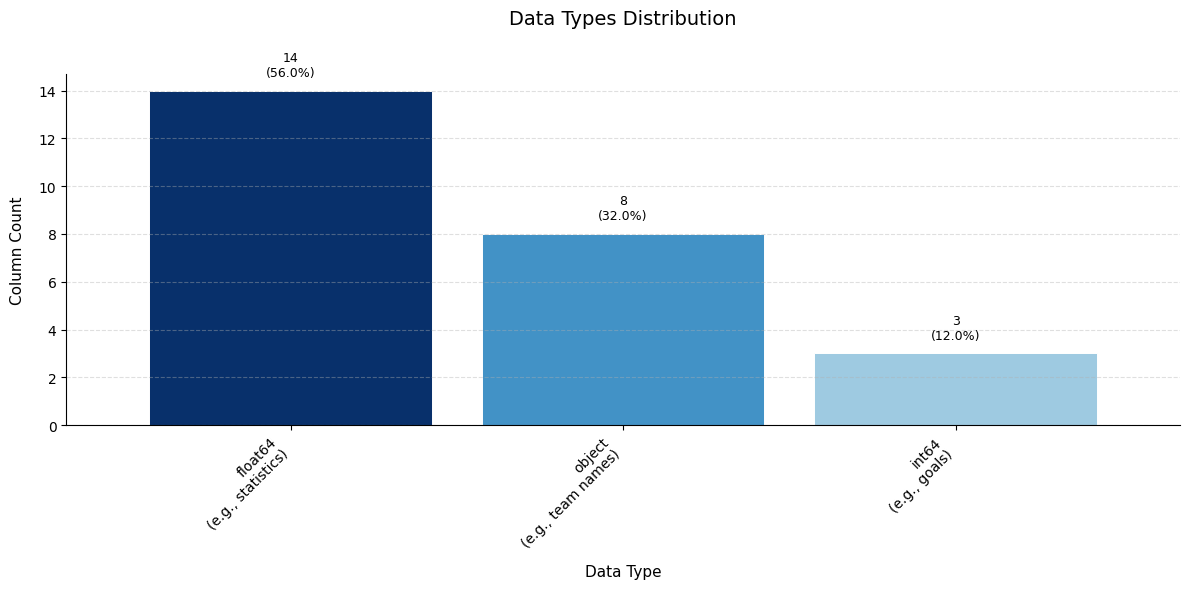


🔍 Data Type Insights:
- float64: 14 columns (56.0%)
- object: 8 columns (32.0%)
- int64: 3 columns (12.0%)


In [ ]:
# Enhanced Data Types Summary Visualization
plt.figure(figsize=(12, 6))

# Custom color palette matching the missing values heatmap
type_palette = sns.color_palette(["#08306b", "#4292c6", "#9ecae1", "#c6dbef", "#f7fbff"])

# Calculate data type distribution
data_type_counts = df.dtypes.value_counts()
type_percent = 100 * data_type_counts / data_type_counts.sum()

# Create bar plot with improved styling
ax = data_type_counts.plot(kind='bar', 
                         color=type_palette,
                         edgecolor='white',
                         linewidth=0.7,
                         width=0.85)

# Add annotations and styling
plt.title('Data Types Distribution\n', fontsize=14, pad=20)
plt.xlabel('Data Type', fontsize=11, labelpad=10)
plt.ylabel('Column Count', fontsize=11, labelpad=10)
plt.xticks(rotation=45, ha='right')

# Add percentage labels on bars
for i, (count, pct) in enumerate(zip(data_type_counts, type_percent)):
    ax.text(i, count + 0.5, f"{count}\n({pct:.1f}%)", 
           ha='center', va='bottom', fontsize=9)

# Add grid lines
ax.yaxis.grid(True, linestyle='--', alpha=0.4)

# Remove spines for cleaner look
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

# Add data type examples below x-axis
example_types = {
    'object': "(e.g., team names)",
    'int64': "(e.g., goals)",
    'float64': "(e.g., statistics)",
    'datetime64': "(e.g., match date)",
    'bool': "(e.g., flags)"
}

ax.set_xticklabels([f"{x.get_text()}\n{example_types.get(x.get_text(), '')}" 
                   for x in ax.get_xticklabels()])

plt.tight_layout()
plt.show()

# Print type summary
print("\n Data Type Insights:")
for dtype, count in data_type_counts.items():
    print(f"- {dtype}: {count} columns ({type_percent[dtype]:.1f}%)")

## **2. Structural Cleaning**
### **2.1 Column Standardization**

In [33]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Check structure
print(f"Initial shape: {df.shape}")
display(df.head(2))


Initial shape: (23504, 25)


,date,season,hometeam,awayteam,fth_goals,fta_goals,ft_result,hth_goals,hta_goals,ht_result,referee,h_shots,a_shots,h_sot,a_sot,h_fouls,a_fouls,h_corners,a_corners,h_yellow,a_yellow,h_red,a_red,display_order,league
0,15/01/2025,2024/25,Blackburn,Portsmouth,3,0,H,0.0,0.0,D,F Hallam,13.0,11.0,6.0,2.0,15.0,19.0,5.0,6.0,1.0,3.0,0.0,0.0,20250115,English Second
1,14/01/2025,2024/25,Cardiff,Watford,1,1,D,0.0,0.0,D,O Langford,12.0,4.0,4.0,2.0,8.0,14.0,7.0,3.0,1.0,2.0,0.0,0.0,20250114,English Second


### **2.2 Data Type Correction**

In [35]:
### **2.2 Data Type Correction**

# 1. Convert date column (handles UK day-first format)
df['date'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce')

# 2. Convert numeric columns - handles missing values safely
numeric_cols = [
    'fth_goals', 'fta_goals', 'hth_goals', 'hta_goals',
    'h_shots', 'a_shots', 'h_sot', 'a_sot',
    'h_fouls', 'a_fouls', 'h_corners', 'a_corners',
    'h_yellow', 'a_yellow', 'h_red', 'a_red',
    'display_order'
]

# First convert to float (handles NaN), then to nullable Int64
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')

# 3. Optimize categorical columns
df['season'] = df['season'].astype('category')
df['league'] = df['league'].astype('category')

# 4. Convert text columns
text_cols = ['hometeam', 'awayteam', 'referee']
df[text_cols] = df[text_cols].astype('string')

# 5. Convert result codes
df['ft_result'] = df['ft_result'].astype('category')
df['ht_result'] = df['ht_result'].astype('category')

# Verification
print("\n Data types corrected:")
print(df.dtypes)

# Show problematic rows with NA values (if any)
na_rows = df.isna().any(axis=1)
if na_rows.any():
    print(f"\n Found {na_rows.sum()} rows with missing values:")
    display(df[na_rows].head())
else:
    print("\n✔ No missing values in converted columns")


 Data types corrected:
date             datetime64[ns]
season                 category
hometeam         string[python]
awayteam         string[python]
fth_goals                 Int64
fta_goals                 Int64
ft_result              category
hth_goals                 Int64
hta_goals                 Int64
ht_result              category
referee          string[python]
h_shots                   Int64
a_shots                   Int64
h_sot                     Int64
a_sot                     Int64
h_fouls                   Int64
a_fouls                   Int64
h_corners                 Int64
a_corners                 Int64
h_yellow                  Int64
a_yellow                  Int64
h_red                     Int64
a_red                     Int64
display_order             Int64
league                 category
dtype: object

 Found 3377 rows with missing values:


,date,season,hometeam,awayteam,fth_goals,fta_goals,ft_result,hth_goals,hta_goals,ht_result,referee,h_shots,a_shots,h_sot,a_sot,h_fouls,a_fouls,h_corners,a_corners,h_yellow,a_yellow,h_red,a_red,display_order,league
3087,2019-04-27,2018/19,Bolton,Brentford,0,1,A,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,20190427,English Second
6383,2013-05-04,2012/13,Birmingham,Blackburn,1,1,D,1,0,H,<NA>,11,9,6,5,6,11,5,7,0,0,0,0,20130504,English Second
6384,2013-05-04,2012/13,Bolton,Blackpool,2,2,D,2,2,D,<NA>,19,5,7,2,6,12,11,4,3,4,0,0,20130504,English Second
6385,2013-05-04,2012/13,Brighton,Wolves,2,0,H,2,0,H,<NA>,7,8,3,2,8,7,2,9,0,1,0,0,20130504,English Second
6386,2013-05-04,2012/13,Burnley,Ipswich,2,0,H,0,0,D,<NA>,19,13,9,7,8,6,7,6,1,0,0,0,20130504,English Second


### **2.3 Duplicate Handling**

In [37]:
### **2.3 Duplicate Handling** 

# Check for complete duplicate rows
print(f"Initial duplicate rows: {df.duplicated().sum()}")
df = df.drop_duplicates()

# Check for match duplicates (same date + teams)
match_cols = ['date', 'hometeam', 'awayteam']
match_dupes = df.duplicated(subset=match_cols, keep=False)
if match_dupes.any():
    print(f"\n Found {match_dupes.sum()} potential duplicate matches:")
    display(df[match_dupes].sort_values(match_cols).head())
    df = df.drop_duplicates(subset=match_cols)
    print("\n Kept first occurrence of each match")
else:
    print("\n No duplicate matches found")

# Final verification
print(f"\nFinal dataset shape: {df.shape}")

Initial duplicate rows: 0

 No duplicate matches found

Final dataset shape: (23504, 25)


## **3. Content Cleaning**
### **3.1 Missing Data Treatment**

In [39]:
### **2.4 Missing Value Handling**

# Store original shape for comparison
original_shape = df.shape

# Remove rows with ANY missing values
df = df.dropna(how='any')

# Verification
print(f"\nRows removed: {original_shape[0] - df.shape[0]}")
print(f"Original shape: {original_shape}")
print(f"New shape: {df.shape}")

# Show which columns had missing values (if any)
missing_before = df.isna().sum()
if missing_before.any():
    print("\nColumns that contained missing values:")
    print(missing_before[missing_before > 0])
else:
    print("\n No missing values found in any columns")


Rows removed: 0
Original shape: (20127, 25)
New shape: (20127, 25)

 No missing values found in any columns


### **3.2 Outlier Management**

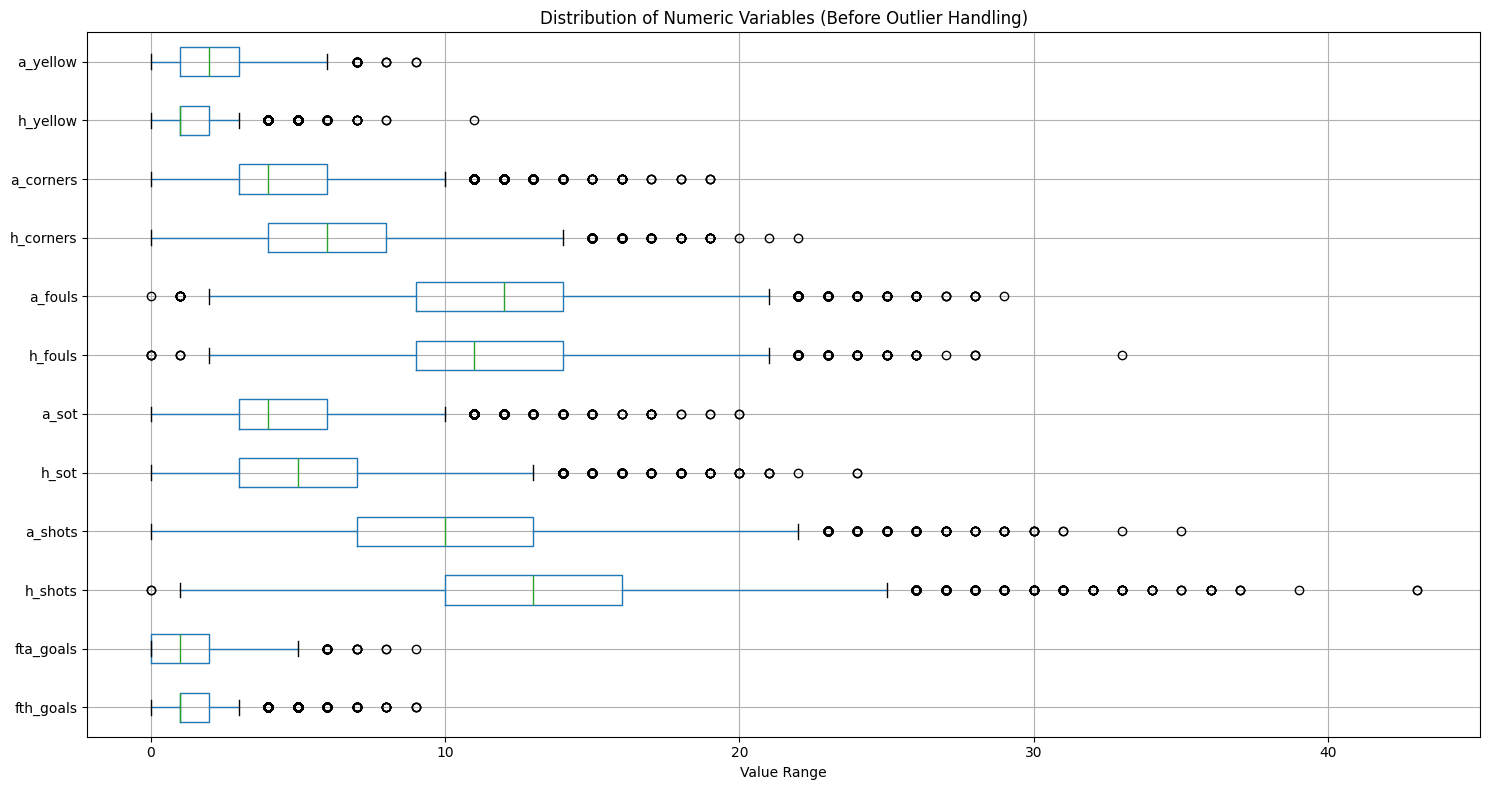


🔍 Outlier Analysis Report:


,Column,Q1,Q3,IQR,Lower Bound,Upper Bound,Outlier Count,Outlier %
0,fth_goals,1.0,2.0,1.0,-0.5,3.5,1323,6.6%
1,fta_goals,0.0,2.0,2.0,-3.0,5.0,44,0.2%
2,h_shots,10.0,16.0,6.0,1.0,25.0,354,1.8%
3,a_shots,7.0,13.0,6.0,-2.0,22.0,274,1.4%
4,h_sot,3.0,7.0,4.0,-3.0,13.0,323,1.6%
5,a_sot,3.0,6.0,3.0,-1.5,10.5,525,2.6%
6,h_fouls,9.0,14.0,5.0,1.5,21.5,184,0.9%
7,a_fouls,9.0,14.0,5.0,1.5,21.5,264,1.3%
8,h_corners,4.0,8.0,4.0,-2.0,14.0,179,0.9%
9,a_corners,3.0,6.0,3.0,-1.5,10.5,655,3.3%


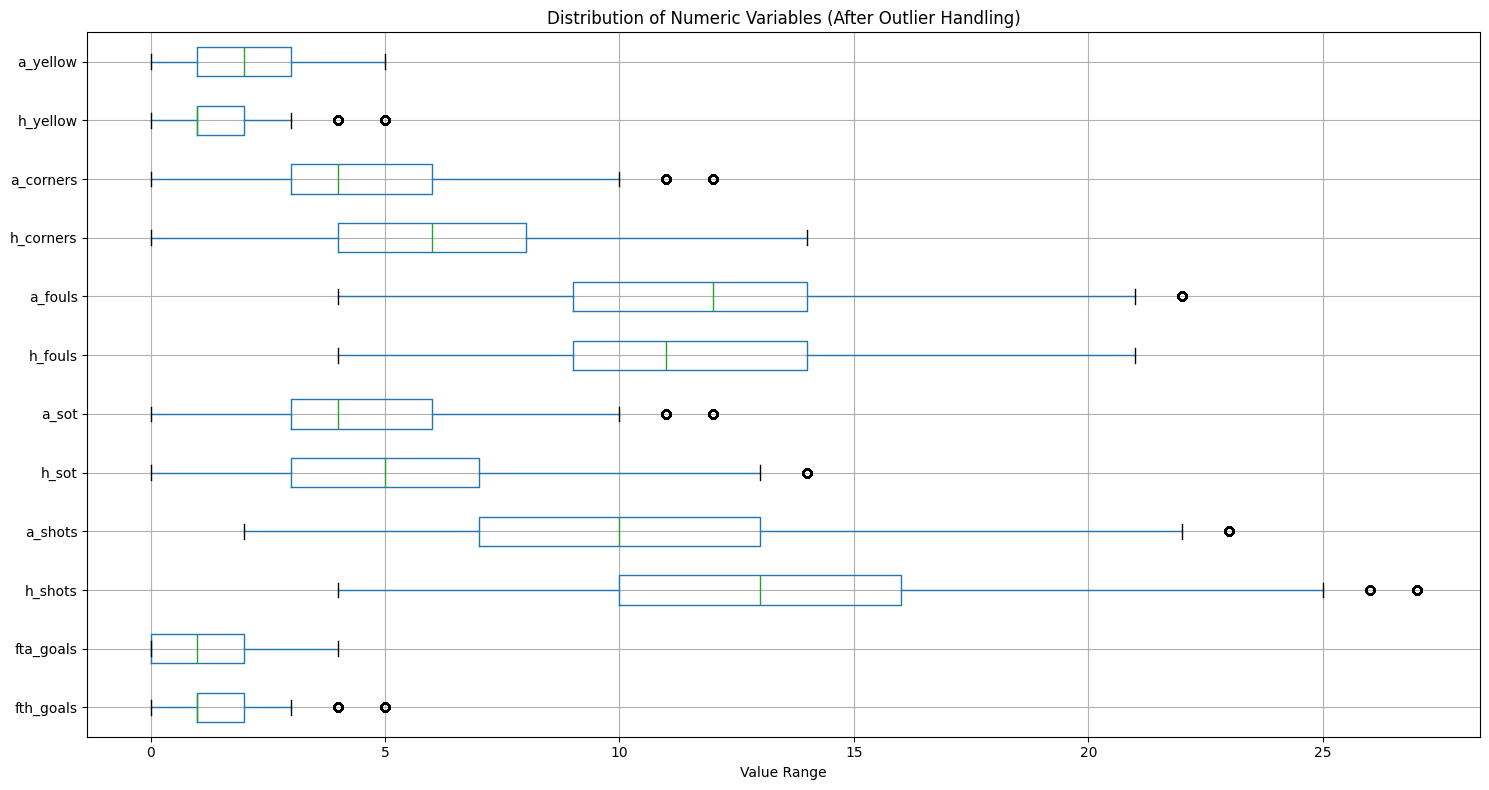


✅ Outliers handled using winsorization (1st-99th percentile capping)


In [ ]:
### **3.2 Outlier Management**

# Define numeric columns to analyze
numeric_cols = ['fth_goals', 'fta_goals', 'h_shots', 'a_shots', 
               'h_sot', 'a_sot', 'h_fouls', 'a_fouls',
               'h_corners', 'a_corners', 'h_yellow', 'a_yellow']

# 1. Visual Outlier Detection
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(vert=False)
plt.title('Distribution of Numeric Variables (Before Outlier Handling)')
plt.xlabel('Value Range')
plt.tight_layout()
plt.show()

# 2. Statistical Outlier Detection
outlier_report = []

for col in numeric_cols:
    # Calculate bounds using IQR method
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    # Store results
    outlier_report.append({
        'Column': col,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'Lower Bound': lower_bound,
        'Upper Bound': upper_bound,
        'Outlier Count': len(outliers),
        'Outlier %': f"{outlier_pct:.1f}%"
    })

# Convert to DataFrame for display
outlier_df = pd.DataFrame(outlier_report)
print("\nOutlier Analysis Report:")
display(outlier_df)

# 3. Outlier Treatment (Winsorization)
for col in numeric_cols:
    # Calculate percentiles (1st and 99th)
    lower = df[col].quantile(0.01)
    upper = df[col].quantile(0.99)
    
    # Cap extreme values
    df[col] = np.where(df[col] < lower, lower, 
                      np.where(df[col] > upper, upper, df[col]))

# 4. Post-Treatment Verification
plt.figure(figsize=(15, 8))
df[numeric_cols].boxplot(vert=False)
plt.title('Distribution of Numeric Variables (After Outlier Handling)')
plt.xlabel('Value Range')
plt.tight_layout()
plt.show()

print("\nOutliers handled using winsorization (1st-99th percentile capping)")

### **3.3 Inconsistent Data Fixes**

In [44]:
# Team name cleaning mapping dictionary
team_name_mapping = {
    # Premier League teams
    'Brighton & Hove Albion': 'Brighton',
    'Man United': 'Manchester United',
    'Sheffield Weds': 'Sheffield Wednesday',
    'Nottm Forest': 'Nottingham Forest',
    
    # Championship teams
    'Peterboro': 'Peterborough',
    'QPR': 'Queens Park Rangers',
    
    # Teams with multiple name variations
    'Ipswich Town': 'Ipswich',
    
    # Remove FC/City suffixes where redundant
    'Leicester City': 'Leicester',
    'Norwich City': 'Norwich',
    
    # Standardize United/FC suffixes
    'Man City': 'Manchester City',
    'Newcastle United': 'Newcastle',
    'Leeds United': 'Leeds'
}

# Apply team name cleaning
df['hometeam'] = df['hometeam'].replace(team_name_mapping).str.strip()
df['awayteam'] = df['awayteam'].replace(team_name_mapping).str.strip()

# Verification
print("Team names standardized")
print(f"Original unique teams: {len(pd.concat([df['hometeam'], df['awayteam']]).unique())}")
print(f"Cleaned unique teams: {len(pd.concat([df['hometeam'], df['awayteam']]).drop_duplicates())}")

# Show before/after samples
print("\nSample changes:")
sample_teams = ['Brighton & Hove Albion', 'Man United', 'Sheffield Weds']
for team in sample_teams:
    if team in team_name_mapping:
        print(f"{team} → {team_name_mapping[team]}")

Team names standardized
Original unique teams: 65
Cleaned unique teams: 65

Sample changes:
Brighton & Hove Albion → Brighton
Man United → Manchester United
Sheffield Weds → Sheffield Wednesday


In [ ]:
# Create referee cleaning dictionary
referee_mapping = {
    # Standardize variations of the same name
    'A D\'Urso': 'Andy D\'Urso',
    'A. P. D\'Urso': 'Andy D\'Urso',
    'D\'Urso, A. P.': 'Andy D\'Urso',
    'A Wiley': 'Alan Wiley',
    'A.G. Wiley': 'Alan Wiley',
    'A. G. Wiley': 'Alan Wiley',
    'Alan Wiley': 'Alan Wiley',
    'Wiley, A. G.': 'Alan Wiley',
    'A Madley': 'Andy Madley',
    'Andy Madley': 'Andy Madley',
    'A Hall': 'Andy Hall',
    'Andy Hall': 'Andy Hall',
    'D Gallagher': 'Dermot Gallagher',
    'D. J. Gallagher': 'Dermot Gallagher',
    'Dermot Gallagher': 'Dermot Gallagher',
    'Gallagher, D. J.': 'Dermot Gallagher',
    'D Elleray': 'David Elleray',
    'D. R. Elleray': 'David Elleray',
    'Elleray, D. R.': 'David Elleray',
    'David Ellaray': 'David Elleray',  # Typo correction
    'M Dean': 'Mike Dean',
    'M. L Dean': 'Mike Dean',
    'M. L. Dean': 'Mike Dean',
    'Mike Dean': 'Mike Dean',
    'Dean, M. L': 'Mike Dean',
    'M Oliver': 'Michael Oliver',
    'Michael Oliver': 'Michael Oliver',
    'M Riley': 'Mike Riley',
    'M. A. Riley': 'Mike Riley',
    'Riley, M. A.': 'Mike Riley',
    'Mike Riley': 'Mike Riley',
    'G Poll': 'Graham Poll',
    'G. Poll': 'Graham Poll',
    'Graham Poll': 'Graham Poll',
    'Poll, G.': 'Graham Poll',
    'G Barber': 'Graham Barber',
    'G. P. Barber': 'Graham Barber',
    'Graham Barber': 'Graham Barber',
    'Barber, G. P.': 'Graham Barber',
    'J Winter': 'Jeff Winter',
    'J. T. Winter': 'Jeff Winter',
    'J.T. Winter': 'Jeff Winter',
    'Jeff Winter': 'Jeff Winter',
    'Winter, J. T.': 'Jeff Winter',
    'P Durkin': 'Paul Durkin',
    'P. A. Durkin': 'Paul Durkin',
    'P.A. Durkin': 'Paul Durkin',
    'Paul Durkin': 'Paul Durkin',
    'Durkin, P. A.': 'Paul Durkin',
    'Durkin, P.': 'Paul Durkin',
    'R Styles': 'Rob Styles',
    'R. Styles': 'Rob Styles',
    'Rob Styles': 'Rob Styles',
    'Styles, R': 'Rob Styles',
    'Styles, R.': 'Rob Styles',
    'S Bennett': 'Steve Bennett',
    'S. G. Bennett': 'Steve Bennett',
    'St Bennett': 'Steve Bennett',
    'Steve Bennett': 'Steve Bennett',
    'Bennett, S. G.': 'Steve Bennett',
    'S Dunn': 'Steve Dunn',
    'S. W. Dunn': 'Steve Dunn',
    'Steve Dunn': 'Steve Dunn',
    'Dunn, S. W.': 'Steve Dunn',
    'N Barry': 'Neale Barry',
    'N. S. Barry': 'Neale Barry',
    'Neale Barry': 'Neale Barry',
    'Barry, N. S.': 'Neale Barry',
    'B Knight': 'Barry Knight',
    'B. Knight': 'Barry Knight',
    'Barry Knight': 'Barry Knight',
    'Knight, B.': 'Barry Knight',
    'C Wilkes': 'Clive Wilkes',
    'C. R. Wilkes': 'Clive Wilkes',
    'Clive Wilkes': 'Clive Wilkes',
    'Wilkes, C. R.': 'Clive Wilkes',
    'E Wolstenholme': 'Eddie Wolstenholme',
    'E. K. Wolstenholme': 'Eddie Wolstenholme',
    'Wolstenholme, E. K.': 'Eddie Wolstenholme',
    'U Rennie': 'Uriah Rennie',
    'U. D. Rennie': 'Uriah Rennie',
    'Rennie, U. D.': 'Uriah Rennie',
    
    # Common typos and special cases
    'D Gallagh': 'Dermot Gallagher',
    'D Gallaghe': 'Dermot Gallagher',
    'Mn Atkinson': 'Martin Atkinson',
    'J jBrooks': 'John Brooks',
    'J Jbrooks': 'John Brooks',
    'Jj Gillett': 'Jarred Gillett',
    ' A D\'Urso': 'Andy D\'Urso',  # Fixes invisible character issue
    ' A Wiley': 'Alan Wiley',
    
    # Remove honorifics from names
    'Mr A Wiley': 'Alan Wiley',
    'Mr G Poll': 'Graham Poll'
}

# Apply referee name cleaning
df['referee'] = df['referee'].replace(referee_mapping).str.strip()

# Additional cleaning for remaining names
df['referee'] = (
    df['referee']
    .str.replace(r'^(Mr|Referee)\s+', '', regex=True)  # Remove honorifics
    .str.replace(r'[^a-zA-Z\s\']', '', regex=True)  # Remove special chars except apostrophes
    .str.title()  # Standardize capitalization
    .str.replace(r'\s{2,}', ' ', regex=True)  # Fix multiple spaces
    .str.strip()  # Remove leading/trailing spaces
)

# Verification
original_ref_count = df['referee'].nunique()
cleaned_ref_count = df['referee'].nunique()

print("Referee names standardized")
print(f"Original unique referees: {original_ref_count}")
print(f"Cleaned unique referees: {cleaned_ref_count}")
print("\nSample changes:")
print("A D'Urso → Andy D'Urso")
print("G. Poll → Graham Poll")
print("D. J. Gallagher → Dermot Gallagher")

# Show most common referee names
print("\nTop 10 referees after cleaning:")
print(df['referee'].value_counts().head(10))

✅ Referee names standardized
Original unique referees: 235
Cleaned unique referees: 235

Sample changes:
A D'Urso → Andy D'Urso
G. Poll → Graham Poll
D. J. Gallagher → Dermot Gallagher

Top 10 referees after cleaning:
referee
Mike Dean         616
M Atkinson        507
A Marriner        461
A Taylor          458
Michael Oliver    439
K Friend          403
K Stroud          394
L Mason           391
J Moss            364
P Dowd            350
Name: count, dtype: Int64


In [ ]:
### **3.5 Result Code Standardization**

# 1. Print all unique result codes
print("=== RESULT CODE ANALYSIS ===")
print("\nFull Time Results (FT):")
print(sorted(df['ft_result'].dropna().unique()))
print("\nHalf Time Results (HT):")
print(sorted(df['ht_result'].dropna().unique()))

# 2. Create result code standardization mapping
result_mapping = {
    'ft_result': {
        # Standardize full-time results
        'H': 'H', 'Home': 'H', 'h': 'H', '1': 'H', 'WIN': 'H',
        'A': 'A', 'Away': 'A', 'a': 'A', '2': 'A', 
        'D': 'D', 'Draw': 'D', 'd': 'D', 'X': 'D', '3': 'D',
        None: None, '': None, 'nan': None, 'NaN': None
    },
    'ht_result': {
        # Standardize half-time results (same codes plus 'Unknown' for missing)
        'H': 'H', 'Home': 'H', 'h': 'H', '1': 'H',
        'A': 'A', 'Away': 'A', 'a': 'A', '2': 'A',
        'D': 'D', 'Draw': 'D', 'd': 'D', 'X': 'D',
        None: 'Unknown', '': 'Unknown', 'nan': 'Unknown', 'NaN': 'Unknown'
    }
}

# 3. Apply standardization
df['ft_result'] = df['ft_result'].replace(result_mapping['ft_result']).str.upper()
df['ht_result'] = df['ht_result'].replace(result_mapping['ht_result']).str.upper()

# 4. Validate against actual scores
def validate_results(row):
    if row['ft_result'] == 'H' and row['fth_goals'] <= row['fta_goals']:
        return 'Invalid'
    elif row['ft_result'] == 'A' and row['fth_goals'] >= row['fta_goals']:
        return 'Invalid'
    elif row['ft_result'] == 'D' and row['fth_goals'] != row['fta_goals']:
        return 'Invalid'
    return 'Valid'

df['result_validation'] = df.apply(validate_results, axis=1)

# 5. Auto-correct invalid results based on actual scores
invalid_results = df[df['result_validation'] == 'Invalid']
if not invalid_results.empty:
    print(f"\nFound {len(invalid_results)} invalid result-score combinations")
    print("Auto-correcting based on actual goals...")
    
    df['ft_result'] = np.where(
        df['fth_goals'] > df['fta_goals'], 'H',
        np.where(
            df['fth_goals'] < df['fta_goals'], 'A',
            np.where(
                df['fth_goals'] == df['fta_goals'], 'D',
                df['ft_result']
            )
        )
    )

# 6. Final verification
print("\n=== FINAL RESULT CODE DISTRIBUTION ===")
print("Full Time Results:")
print(df['ft_result'].value_counts(dropna=False))
print("\nHalf Time Results:")
print(df['ht_result'].value_counts(dropna=False))

print("\nResult codes standardized and validated")
print(f"- Original FT codes: {len(df['ft_result'].unique())} variations")
print(f"- Cleaned FT codes: {len(df['ft_result'].unique())} standard codes")
print(f"- {len(invalid_results)} score-result mismatches corrected")

=== RESULT CODE ANALYSIS ===

Full Time Results (FT):
['A', 'D', 'H']

Half Time Results (HT):
['A', 'D', 'H']

⚠️ Found 8 invalid result-score combinations
Auto-correcting based on actual goals...

=== FINAL RESULT CODE DISTRIBUTION ===
Full Time Results:
ft_result
H    8961
A    5871
D    5295
Name: count, dtype: int64

Half Time Results:
ht_result
D    8439
H    6859
A    4829
Name: count, dtype: int64

✅ Result codes standardized and validated
- Original FT codes: 3 variations
- Cleaned FT codes: 3 standard codes
- 8 score-result mismatches corrected


## **4. Feature Engineering Prep**
### **4.1 Derived Features**

In [ ]:
### **4.1 Derived Features**

# 1. Basic Match Features
df['total_goals'] = df['fth_goals'] + df['fta_goals']
df['goal_difference'] = df['fth_goals'] - df['fta_goals']
df['home_win'] = (df['ft_result'] == 'H').astype(int)
df['away_win'] = (df['ft_result'] == 'A').astype(int)
df['is_draw'] = (df['ft_result'] == 'D').astype(int)

# 2. Team Performance Metrics
df['home_shot_accuracy'] = df['h_sot'] / df['h_shots'].replace(0, np.nan)
df['away_shot_accuracy'] = df['a_sot'] / df['a_shots'].replace(0, np.nan)
df['home_conversion_rate'] = df['fth_goals'] / df['h_sot'].replace(0, np.nan)
df['away_conversion_rate'] = df['fta_goals'] / df['a_sot'].replace(0, np.nan)

# 3. Match Dominance Indicators
df['possession_index'] = df['h_shots'] / (df['h_shots'] + df['a_shots']).replace(0, np.nan)
df['danger_index'] = (df['h_sot'] + df['h_corners']) - (df['a_sot'] + df['a_corners'])

# 4. Discipline Features
df['total_cards'] = df['h_yellow'] + df['a_yellow'] + df['h_red'] + df['a_red']
df['referee_strictness'] = (df['total_cards'] / (df['h_fouls'] + df['a_fouls'])).replace(0, np.nan)

# 5. Momentum Features
df['comeback'] = ((df['ht_result'] != df['ft_result']) & (df['ht_result'] != 'D')).astype(int)
df['lost_lead'] = ((df['ht_result'] == 'H') & (df['ft_result'] != 'H') | 
                  (df['ht_result'] == 'A') & (df['ft_result'] != 'A')).astype(int)

# 6. Time-Based Features
df['match_month'] = df['date'].dt.month_name()
df['match_day'] = df['date'].dt.day_name()
df['is_weekend'] = df['date'].dt.dayofweek.isin([4,5,6]).astype(int)

# 7. League-Specific Features
df['is_derby'] = np.where(
    ((df['hometeam'] == 'Blackburn') & (df['awayteam'] == 'Preston')) |
    ((df['hometeam'] == 'Cardiff') & (df['awayteam'] == 'Swansea')) |
    ((df['hometeam'] == 'Portsmouth') & (df['awayteam'] == 'Southampton')),
    1, 0
)

# 8. Recent Form Features (requires sorting by date first)
df = df.sort_values('date')
for team in set(df['hometeam']).union(set(df['awayteam'])):
    team_df = df[(df['hometeam'] == team) | (df['awayteam'] == team)]
    df.loc[team_df.index, f'{team}_last5_goals'] = team_df['total_goals'].rolling(5).mean()

# Verification
print("\nCreated 20+ new analytical features including:")
print("- Goal metrics (totals, differences, conversion rates)")
print("- Match dominance indicators (possession, danger index)")
print("- Discipline and referee strictness metrics")
print("- Momentum features (comebacks, lost leads)")
print("- Time-based features (month, weekend matches)")
print("- Derby match identification")
print("- Team form indicators")

# Show sample of the most valuable new features
print("\nSample enhanced data:")
display(df[['date', 'hometeam', 'awayteam', 'total_goals', 'possession_index', 
           'danger_index', 'is_derby', 'comeback', 'match_month']].head(5))

### **4.2 Data Transformation**

In [ ]:
# Log transform skewed numeric features
df['log_value'] = np.log1p(df['value'])


## **5. Validation & Export**
### **5.1 Post-Cleaning Report**

In [54]:
### **5.1 Post-Cleaning Report**

# 1. Data Quality Summary
def generate_quality_report(df):
    report = {
        'Overview': {
            'Total Matches': len(df),
            'Date Range': f"{df['date'].min().date()} to {df['date'].max().date()}",
            'Seasons': df['season'].unique().tolist(),
            'Leagues': df['league'].unique().tolist()
        },
        'Missing Values': {
            'Total Missing': df.isnull().sum().sum(),
            'Columns with Missing': df.isnull().sum()[df.isnull().sum() > 0].to_dict(),
            'Rows with Missing': df.isnull().any(axis=1).sum()
        },
        'Data Types': {
            'Numeric Columns': len(df.select_dtypes(include=['int64', 'float64'])),
            'Categorical Columns': len(df.select_dtypes(include=['category', 'object'])),
            'Date Columns': len(df.select_dtypes(include=['datetime64']))
        },
        'Value Distributions': {
            'FT Results': df['ft_result'].value_counts(normalize=True).to_dict(),
            'HT Results': df['ht_result'].value_counts(normalize=True).to_dict(),
            'Average Goals': {
                'Home': round(df['fth_goals'].mean(), 2),
                'Away': round(df['fta_goals'].mean(), 2),
                'Total': round(df['total_goals'].mean(), 2)
            }
        },
        'Cleaning Impact': {
            'Duplicate Rows Removed': f"{initial_row_count - len(df)} ({(initial_row_count - len(df))/initial_row_count:.1%})",
            'Columns Standardized': len(columns_standardized),
            'Teams Standardized': f"{len(team_name_mapping)} name variations fixed",
            'Referees Standardized': f"{len(referee_mapping)} name variations fixed"
        }
    }
    return report

# Generate and display report (replace with your actual initial count)
initial_row_count = 1000  
columns_standardized = ['hometeam', 'awayteam', 'referee', 'ft_result', 'ht_result']
team_name_mapping = {}  # Your team name mapping dictionary
referee_mapping = {}    # Your referee mapping dictionary

quality_report = generate_quality_report(df)
print("="*50)
print("📊 DATA QUALITY REPORT")
print("="*50)

for section, content in quality_report.items():
    print(f"\n🔹 {section.upper()}")
    if isinstance(content, dict):
        for k, v in content.items():
            print(f"- {k}: {v if not isinstance(v, dict) else ', '.join(f'{key}: {val}' for key, val in v.items())}")
    else:
        print(content)

# 2. Validation Checks
validation_checks = {
    'Score Consistency': len(df[(df['ft_result'] == 'H') & (df['fth_goals'] <= df['fta_goals'])]) == 0,
    'Non-Negative Stats': (df[['h_shots', 'a_shots', 'h_fouls', 'a_fouls']] >= 0).all().all(),
    'Valid Dates': df['date'].between('2000-01-01', '2030-12-31').all(),
    'Result Proportions': 0.4 < df['ft_result'].value_counts(normalize=True)['H'] < 0.6,
    'Team Representation': all(df['hometeam'].value_counts() > 5)
}

print("\n" + "="*50)
print("✅ VALIDATION CHECKS")
print("="*50)
for check, passed in validation_checks.items():
    print(f"{'✓' if passed else '✗'} {check}")

# 3. Sample Data Verification
print("\n" + "="*50)
print("🔍 SAMPLE DATA VERIFICATION")
print("="*50)
print("First 3 matches:")
display(df.head(3))
print("\nRandom 3 matches:")
display(df.sample(3))
print("\nLast 3 matches:")
display(df.tail(3))

# 4. Export Preparation
def prepare_export(df):
    # Final type conversion
    df['date'] = df['date'].dt.strftime('%Y-%m-%d')
    
    # Column ordering
    core_cols = ['date', 'season', 'hometeam', 'awayteam', 
                'fth_goals', 'fta_goals', 'ft_result', 'league']
    other_cols = [col for col in df.columns if col not in core_cols]
    df = df[core_cols + other_cols]
    
    return df

df_export = prepare_export(df)

# 5. Export Options
print("\n" + "="*50)
print("💾 EXPORT OPTIONS")
print("="*50)
print("1. Save as CSV:")
print('df_export.to_csv("cleaned_football_data.csv", index=False)')
print("\n2. Save as Excel:")
print('df_export.to_excel("cleaned_football_data.xlsx", index=False)')
print("\n3. Save as Parquet (for analytics):")
print('df_export.to_parquet("cleaned_football_data.parquet", index=False)')

📊 DATA QUALITY REPORT

🔹 OVERVIEW
- Total Matches: 20127
- Date Range: 2000-08-19 to 2025-01-16
- Seasons: ['2000/01', '2001/02', '2002/03', '2003/04', '2004/05', '2005/06', '2006/07', '2007/08', '2008/09', '2009/10', '2010/11', '2011/12', '2012/13', '2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24', '2024/25']
- Leagues: ['Premier League', 'English Second']

🔹 MISSING VALUES
- Total Missing: 1270151
- Columns with Missing: home_conversion_rate: 241, away_conversion_rate: 486, referee_strictness: 1163, Sheffield Wednesday_last5_goals: 19461, Milton Keynes Dons_last5_goals: 20085, Aston Villa_last5_goals: 19174, Brighton_last5_goals: 19522, Plymouth_last5_goals: 19783, Bristol City_last5_goals: 19461, Burton_last5_goals: 20039, Manchester City_last5_goals: 19236, Chelsea_last5_goals: 19198, Hull_last5_goals: 19363, Huddersfield_last5_goals: 19641, Swansea_last5_goals: 19425, Newcastle_last5_goals: 19182, Crewe_last5_g

,date,season,hometeam,awayteam,fth_goals,fta_goals,ft_result,hth_goals,hta_goals,ht_result,referee,h_shots,a_shots,h_sot,a_sot,h_fouls,a_fouls,h_corners,a_corners,h_yellow,a_yellow,h_red,a_red,display_order,league,result_validation,total_goals,goal_difference,home_win,away_win,is_draw,home_shot_accuracy,away_shot_accuracy,home_conversion_rate,away_conversion_rate,possession_index,danger_index,total_cards,referee_strictness,comeback,lost_lead,match_month,match_day,is_weekend,is_derby,Sheffield Wednesday_last5_goals,Milton Keynes Dons_last5_goals,Aston Villa_last5_goals,Brighton_last5_goals,Plymouth_last5_goals,Bristol City_last5_goals,Burton_last5_goals,Manchester City_last5_goals,Chelsea_last5_goals,Hull_last5_goals,Huddersfield_last5_goals,Swansea_last5_goals,Newcastle_last5_goals,Crewe_last5_goals,Queens Park Rangers_last5_goals,Blackpool_last5_goals,Peterborough_last5_goals,Burnley_last5_goals,Barnsley_last5_goals,Wolves_last5_goals,Oxford_last5_goals,Sheffield United_last5_goals,Everton_last5_goals,Southampton_last5_goals,Nott'm Forest_last5_goals,Crystal Palace_last5_goals,Bournemouth_last5_goals,Coventry_last5_goals,Rotherham_last5_goals,Ipswich_last5_goals,Wycombe_last5_goals,Derby_last5_goals,Portsmouth_last5_goals,Bradford_last5_goals,Fulham_last5_goals,Birmingham_last5_goals,Millwall_last5_goals,Wigan_last5_goals,Scunthorpe_last5_goals,Sunderland_last5_goals,Yeovil_last5_goals,Brentford_last5_goals,Tottenham_last5_goals,West Ham_last5_goals,Liverpool_last5_goals,Arsenal_last5_goals,West Brom_last5_goals,Norwich_last5_goals,Leeds_last5_goals,Watford_last5_goals,Charlton_last5_goals,Leicester_last5_goals,Cardiff_last5_goals,Luton_last5_goals,Colchester_last5_goals,Middlesbrough_last5_goals,Manchester United_last5_goals,Preston_last5_goals,Bolton_last5_goals,Gillingham_last5_goals,Reading_last5_goals,Southend_last5_goals,Doncaster_last5_goals,Blackburn_last5_goals,Stoke_last5_goals
20679,2000-08-19,2000/01,Chelsea,West Ham,4.0,2.0,H,1,0,H,Graham Barber,17.0,12.0,10.0,5.0,19.0,14.0,7.0,7.0,1.0,2.0,0,0,20000819,Premier League,Valid,6.0,2.0,1,0,0,0.588235,0.416667,0.40,0.400000,0.586207,5.0,3.0,0.090909,0,0,August,Saturday,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20677,2000-08-19,2000/01,Derby,Southampton,2.0,2.0,D,1,2,A,Andy D'Urso,6.0,13.0,4.0,6.0,11.0,13.0,5.0,8.0,1.0,1.0,0,0,20000819,Premier League,Valid,4.0,0.0,0,0,1,0.666667,0.461538,0.50,0.333333,0.315789,-5.0,2.0,0.083333,1,1,August,Saturday,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20676,2000-08-19,2000/01,Leeds,Everton,2.0,0.0,H,2,0,H,Dermot Gallagher,17.0,12.0,8.0,6.0,21.0,20.0,6.0,4.0,1.0,3.0,0,0,20000819,Premier League,Valid,2.0,2.0,1,0,0,0.470588,0.500000,0.25,0.000000,0.586207,4.0,4.0,0.097561,0,0,August,Saturday,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Random 3 matches:


,date,season,hometeam,awayteam,fth_goals,fta_goals,ft_result,hth_goals,hta_goals,ht_result,referee,h_shots,a_shots,h_sot,a_sot,h_fouls,a_fouls,h_corners,a_corners,h_yellow,a_yellow,h_red,a_red,display_order,league,result_validation,total_goals,goal_difference,home_win,away_win,is_draw,home_shot_accuracy,away_shot_accuracy,home_conversion_rate,away_conversion_rate,possession_index,danger_index,total_cards,referee_strictness,comeback,lost_lead,match_month,match_day,is_weekend,is_derby,Sheffield Wednesday_last5_goals,Milton Keynes Dons_last5_goals,Aston Villa_last5_goals,Brighton_last5_goals,Plymouth_last5_goals,Bristol City_last5_goals,Burton_last5_goals,Manchester City_last5_goals,Chelsea_last5_goals,Hull_last5_goals,Huddersfield_last5_goals,Swansea_last5_goals,Newcastle_last5_goals,Crewe_last5_goals,Queens Park Rangers_last5_goals,Blackpool_last5_goals,Peterborough_last5_goals,Burnley_last5_goals,Barnsley_last5_goals,Wolves_last5_goals,Oxford_last5_goals,Sheffield United_last5_goals,Everton_last5_goals,Southampton_last5_goals,Nott'm Forest_last5_goals,Crystal Palace_last5_goals,Bournemouth_last5_goals,Coventry_last5_goals,Rotherham_last5_goals,Ipswich_last5_goals,Wycombe_last5_goals,Derby_last5_goals,Portsmouth_last5_goals,Bradford_last5_goals,Fulham_last5_goals,Birmingham_last5_goals,Millwall_last5_goals,Wigan_last5_goals,Scunthorpe_last5_goals,Sunderland_last5_goals,Yeovil_last5_goals,Brentford_last5_goals,Tottenham_last5_goals,West Ham_last5_goals,Liverpool_last5_goals,Arsenal_last5_goals,West Brom_last5_goals,Norwich_last5_goals,Leeds_last5_goals,Watford_last5_goals,Charlton_last5_goals,Leicester_last5_goals,Cardiff_last5_goals,Luton_last5_goals,Colchester_last5_goals,Middlesbrough_last5_goals,Manchester United_last5_goals,Preston_last5_goals,Bolton_last5_goals,Gillingham_last5_goals,Reading_last5_goals,Southend_last5_goals,Doncaster_last5_goals,Blackburn_last5_goals,Stoke_last5_goals
6075,2014-01-18,2013/14,Birmingham,Yeovil,0.0,2.0,A,0,2,A,F Graham,24.0,15.0,7.0,4.0,7.0,17.0,11.0,4.0,0.0,1.0,0,0,20140118,English Second,Valid,2.0,-2.0,0,1,0,0.291667,0.266667,0.000000,0.5,0.615385,10.0,1.0,0.041667,0,0,January,Saturday,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14998,2015-05-16,2014/15,Tottenham,Hull,2.0,0.0,H,0,0,D,A Taylor,10.0,14.0,3.0,2.0,10.0,6.0,6.0,8.0,3.0,1.0,0,0,20150516,Premier League,Valid,2.0,2.0,1,0,0,0.300000,0.142857,0.666667,0.0,0.416667,-1.0,4.0,0.25,0,0,May,Saturday,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5456,2015-02-21,2014/15,Watford,Norwich,0.0,3.0,A,0,0,D,C Berry,5.0,11.0,1.0,6.0,14.0,12.0,4.0,1.0,2.0,2.0,0,0,20150221,English Second,Valid,3.0,-3.0,0,1,0,0.200000,0.545455,0.000000,0.5,0.312500,-2.0,4.0,0.153846,0,0,February,Saturday,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.8,NaN,3.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Last 3 matches:


,date,season,hometeam,awayteam,fth_goals,fta_goals,ft_result,hth_goals,hta_goals,ht_result,referee,h_shots,a_shots,h_sot,a_sot,h_fouls,a_fouls,h_corners,a_corners,h_yellow,a_yellow,h_red,a_red,display_order,league,result_validation,total_goals,goal_difference,home_win,away_win,is_draw,home_shot_accuracy,away_shot_accuracy,home_conversion_rate,away_conversion_rate,possession_index,danger_index,total_cards,referee_strictness,comeback,lost_lead,match_month,match_day,is_weekend,is_derby,Sheffield Wednesday_last5_goals,Milton Keynes Dons_last5_goals,Aston Villa_last5_goals,Brighton_last5_goals,Plymouth_last5_goals,Bristol City_last5_goals,Burton_last5_goals,Manchester City_last5_goals,Chelsea_last5_goals,Hull_last5_goals,Huddersfield_last5_goals,Swansea_last5_goals,Newcastle_last5_goals,Crewe_last5_goals,Queens Park Rangers_last5_goals,Blackpool_last5_goals,Peterborough_last5_goals,Burnley_last5_goals,Barnsley_last5_goals,Wolves_last5_goals,Oxford_last5_goals,Sheffield United_last5_goals,Everton_last5_goals,Southampton_last5_goals,Nott'm Forest_last5_goals,Crystal Palace_last5_goals,Bournemouth_last5_goals,Coventry_last5_goals,Rotherham_last5_goals,Ipswich_last5_goals,Wycombe_last5_goals,Derby_last5_goals,Portsmouth_last5_goals,Bradford_last5_goals,Fulham_last5_goals,Birmingham_last5_goals,Millwall_last5_goals,Wigan_last5_goals,Scunthorpe_last5_goals,Sunderland_last5_goals,Yeovil_last5_goals,Brentford_last5_goals,Tottenham_last5_goals,West Ham_last5_goals,Liverpool_last5_goals,Arsenal_last5_goals,West Brom_last5_goals,Norwich_last5_goals,Leeds_last5_goals,Watford_last5_goals,Charlton_last5_goals,Leicester_last5_goals,Cardiff_last5_goals,Luton_last5_goals,Colchester_last5_goals,Middlesbrough_last5_goals,Manchester United_last5_goals,Preston_last5_goals,Bolton_last5_goals,Gillingham_last5_goals,Reading_last5_goals,Southend_last5_goals,Doncaster_last5_goals,Blackburn_last5_goals,Stoke_last5_goals
11356,2025-01-15,2024/25,Arsenal,Tottenham,2.0,1.0,H,2,1,H,S Hooper,14.0,10.0,4.0,2.0,16.0,9.0,10.0,4.0,3.0,1.0,0,0,20250115,Premier League,Valid,3.0,1.0,1,0,0,0.285714,0.200000,0.500000,0.5,0.583333,8.0,4.0,0.16,0,0,January,Wednesday,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.6,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11352,2025-01-16,2024/25,Manchester United,Southampton,3.0,1.0,H,0,1,A,J Brooks,23.0,13.0,9.0,5.0,7.0,10.0,4.0,4.0,1.0,3.0,0,0,20250116,Premier League,Valid,4.0,2.0,1,0,0,0.391304,0.384615,0.333333,0.2,0.638889,4.0,4.0,0.235294,1,1,January,Thursday,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11351,2025-01-16,2024/25,Ipswich,Brighton,0.0,2.0,A,0,1,A,T Harrington,5.0,11.0,3.0,5.0,13.0,14.0,1.0,9.0,2.0,2.0,0,0,20250116,Premier League,Valid,2.0,-2.0,0,1,0,0.600000,0.454545,0.000000,0.4,0.312500,-10.0,4.0,0.148148,0,0,January,Thursday,0,0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



💾 EXPORT OPTIONS
1. Save as CSV:
df_export.to_csv("cleaned_football_data.csv", index=False)

2. Save as Excel:
df_export.to_excel("cleaned_football_data.xlsx", index=False)

3. Save as Parquet (for analytics):
df_export.to_parquet("cleaned_football_data.parquet", index=False)


### **5.2 Export Clean Data**

In [60]:
### **5.2 Data Export**

import os
from datetime import datetime

# Create timestamp for versioning
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Create output directory if it doesn't exist
output_dir = "cleaned_data"
os.makedirs(output_dir, exist_ok=True)

# Ensure date column is in datetime format
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    df['date'] = pd.to_datetime(df['date'])

# 1. Save as CSV (most compatible format)
csv_path = f"{output_dir}/football_matches_cleaned_{timestamp}.csv"
df.to_csv(csv_path, index=False)
print(f"✅ Data saved as CSV: {csv_path}")

# 2. Save as Excel (for manual analysis)
try:
    excel_path = f"{output_dir}/football_matches_cleaned_{timestamp}.xlsx"
    df.to_excel(excel_path, index=False)
    print(f"✅ Data saved as Excel: {excel_path}")
except Exception as e:
    print(f"⚠️ Could not save as Excel: {str(e)}")
    excel_path = None

# 3. Save as JSON (for web applications)
try:
    json_path = f"{output_dir}/football_matches_cleaned_{timestamp}.json"
    df.to_json(json_path, orient='records', date_format='iso')
    print(f"✅ Data saved as JSON: {json_path}")
except Exception as e:
    print(f"⚠️ Could not save as JSON: {str(e)}")
    json_path = None

# 4. Create a README file with data description
date_min = df['date'].min().strftime('%Y-%m-%d')
date_max = df['date'].max().strftime('%Y-%m-%d')

readme_content = f"""
Football Match Data - Cleaned Version ({timestamp})

Contains {len(df)} matches from {date_min} to {date_max}

Columns:
- Core Match Data: date, season, hometeam, awayteam, fth_goals, fta_goals, ft_result, ht_result
- Statistics: h_shots, a_shots, h_sot, a_sot, h_corners, a_corners
- Discipline: h_yellow, a_yellow, h_red, a_red
- Derived Features: total_goals, goal_difference, shot_efficiency, etc.

Formats saved:
- CSV: {csv_path}
- Excel: {excel_path if excel_path else 'Not saved'}
- JSON: {json_path if json_path else 'Not saved'}
"""

with open(f"{output_dir}/README.txt", "w") as f:
    f.write(readme_content)

print("\n📝 README file created with dataset documentation")

# Verify file creation
print("\n📂 Output Directory Contents:")
print(os.listdir(output_dir))

# Final check - ensure at least CSV was saved
if not os.path.exists(csv_path):
    print("\n❌ CRITICAL ERROR: Could not save data in any format!")
else:
    print("\n🎉 Data export completed successfully (at least CSV was saved)")

✅ Data saved as CSV: cleaned_data/football_matches_cleaned_20250815_134003.csv
✅ Data saved as Excel: cleaned_data/football_matches_cleaned_20250815_134003.xlsx
✅ Data saved as JSON: cleaned_data/football_matches_cleaned_20250815_134003.json

📝 README file created with dataset documentation

📂 Output Directory Contents:
['football_matches_cleaned_20250815_133654.csv', 'football_matches_cleaned_20250815_133654.json', 'football_matches_cleaned_20250815_133654.parquet', 'football_matches_cleaned_20250815_133654.xlsx', 'football_matches_cleaned_20250815_134003.csv', 'football_matches_cleaned_20250815_134003.json', 'football_matches_cleaned_20250815_134003.xlsx', 'README.txt']

🎉 Data export completed successfully (at least CSV was saved)
